<a href="https://colab.research.google.com/github/glennamaria/task1/blob/main/Loanprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import numpy as np # linear algebra
import pandas as pd

In [66]:
path="/content/drive/MyDrive/Test data.csv"
test= pd.read_csv(path)
test

,LoanID,LoanAmount,Name,Age,Gender,DPD,MaritalStatus,Employer,FamilyDependants,Loanamount,Tenure,EMI,NetIncome,CIBIL,ChequeBounce,Extent,State,Deliquency,Nil
0,4.313600e+14,200000,SELVAPRAKASH,25,MALE,0,MARRIED,Self Employed Business/Driver,0,200000,36,7795,16000,721,No,5.5CENT,TAMIL NADU,Nil,NaN
1,4.333600e+14,500000,NARMADA BARAL,44,FEMALE,0,MARRIED,Self Employed Business/Driver,0,500000,48,16026,121000,-1,No,15CENT,ODISHA,Nil,NaN
2,4.338000e+14,500000,BIJAYA KUMAR SAHOO,50,MALE,0,MARRIED,Self Employed Business/Driver,0,500000,36,18582,98410,792,No,19.3CENT,ODISHA,Nil,NaN
3,4.123400e+14,400000,HARISH P,25,MALE,0,UNMARRIED,Salaried Professional,2,400000,120,8681,1600,786,No,10.25CENT,KERALA,Nil,NaN
4,4.334500e+14,500000,CHHOTEKUMAR YADAV,38,MALE,0,MARRIED,Self Employed Professional,0,500000,60,13810,27000,-1,No,2.1CENT,BIHAR,Nil,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,4.128400e+14,300000,KOWSHIK GOWDA T S,27,MALE,0,UNMARRIED,Salaried Professional,0,300000,60,8544,291400,777,No,2.75CENT,KARNATAKA,Yes,NaN
1175,4.330400e+14,100000,SHARADA PRASADH PANDA,59,MALE,230,MARRIED,Self Employed Business/Driver,0,100000,36,3871,35000,-1,No,4CENT,ODISHA,Nil,NaN
1176,4.330400e+14,100000,NITYANANDA KANDI,42,MALE,0,MARRIED,Self Employed Business/Driver,0,100000,36,3871,5000,-1,No,12.5CENT,ODISHA,Nil,NaN
1177,4.313600e+14,400000,KAVIYARASI,34,FEMALE,0,MARRIED,Self Employed Business/Driver,0,400000,48,13375,59900,776,No,3.61CENT,TAMIL NADU,Nil,NaN


In [67]:
path="/content/drive/MyDrive/Train data.csv"
train= pd.read_csv(path)
train

,LoanID,LoanAmount,Name,Age,Gender,DPD,MaritalStatus,Employer,FamilyDependants,Loanamount,Tenure,EMI,NetIncome,CIBIL,ChequeBounce,Extent,State,Deliquency
0,4.334500e+14,250000,TUNTUN CHAUDHARY,42,MALE,0,MARRIED,Self Employed Professional,0,250000,36,9809,100000,628,No,3.125DECIMAL,BIHAR,Nil
1,4.330400e+14,250000,BABAJI LENKA,51,MALE,0,MARRIED,Self Employed Business/Driver,0,250000,96,5395,29000,785,No,07CENT,ODISHA,Nil
2,4.347500e+14,400000,RAVADA PRIYA,42,FEMALE,0,MARRIED,Salaried Professional,0,400000,84,9871,23797,769,No,0.93CENT,ANDHRA PRADESH,Nil
3,4.333600e+14,500000,DIPTIMAYEE JENA,31,FEMALE,0,MARRIED,Self Employed Business/Driver,0,500000,36,19486,34400,-1,No,0.09CENT,ODISHA,Nil
4,4.333600e+14,350000,NALINI SEN,35,MALE,23,OTHERS,Self Employed Business/Driver,0,350000,60,9867,-6700,738,No,4CENT,ODISHA,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,4.330400e+14,300000,SANATAN MALIKA,30,FEMALE,336,MARRIED,Salaried Professional,0,300000,120,6406,25000,-1,No,12CENT,ODISHA,Yes
1145,4.128400e+14,350000,PRASANNAKUMARA H S,30,MALE,0,MARRIED,Salaried Professional,0,350000,60,9967,62700,-1,No,3.9CENT,KARNATAKA,Nil
1146,4.128400e+14,750000,RITEESH,33,MALE,0,MARRIED,Salaried Professional,0,750000,108,15263,90200,-1,No,4.17CENT,KARNATAKA,Nil
1147,4.128400e+14,250000,SAMPATH,44,MALE,0,MARRIED,Salaried Professional,0,250000,48,8151,35496,-1,No,0.9CENT,KARNATAKA,Nil


In [68]:

train.shape

(1149, 18)

In [69]:
test.shape

(1179, 19)

In [70]:
print("Columns: ", len(train.columns))

Columns:  18


In [71]:
loan_train_columns = train.columns
loan_train_columns

Index(['LoanID', 'LoanAmount', 'Name', 'Age', 'Gender', 'DPD', 'MaritalStatus',
       'Employer', 'FamilyDependants', 'Loanamount', 'Tenure', 'EMI',
       'NetIncome', 'CIBIL', 'ChequeBounce', 'Extent', 'State', 'Deliquency'],
      dtype='object')

In [72]:
train.describe()

,LoanID,LoanAmount,Age,DPD,FamilyDependants,Loanamount,Tenure,EMI,NetIncome,CIBIL
count,1.149000e+03,1.149000e+03,1149.000000,1149.000000,1149.000000,1.149000e+03,1149.000000,1149.000000,1.149000e+03,1149.000000
mean,4.298001e+14,4.723551e+05,38.699739,42.237598,0.074848,4.736301e+05,66.057441,12619.901654,5.793379e+04,465.471715
std,7.076056e+12,2.820789e+05,9.173198,157.044014,0.372817,2.815262e+05,21.599140,6299.345080,1.180124e+05,354.414247
min,4.123400e+14,3.500000e+04,20.000000,0.000000,0.000000,1.000000e+05,24.000000,1738.000000,-3.720000e+05,-1.000000
25%,4.313600e+14,3.000000e+05,31.000000,0.000000,0.000000,3.000000e+05,60.000000,8630.000000,2.446100e+04,-1.000000
50%,4.330400e+14,4.000000e+05,38.000000,0.000000,0.000000,4.000000e+05,60.000000,11606.000000,4.500000e+04,699.000000
75%,4.333600e+14,5.000000e+05,45.000000,0.000000,0.000000,5.000000e+05,72.000000,14240.000000,6.810000e+04,746.000000
max,4.347900e+14,2.500000e+06,66.000000,1020.000000,4.000000,2.500000e+06,120.000000,52545.000000,3.496800e+06,829.000000


In [73]:
test.describe()

,LoanID,LoanAmount,Age,DPD,FamilyDependants,Loanamount,Tenure,EMI,NetIncome,CIBIL,Nil
count,1.179000e+03,1.179000e+03,1179.000000,1179.000000,1179.000000,1.179000e+03,1179.000000,1179.000000,1.179000e+03,1179.000000,0.0
mean,4.299598e+14,4.833664e+05,38.965225,55.517388,0.079729,4.834385e+05,66.230704,12895.520780,8.015575e+04,481.535199,NaN
std,6.984223e+12,3.193088e+05,9.387325,182.464175,0.391447,3.191806e+05,21.785364,9226.689558,8.548538e+05,348.717039,NaN
min,4.123400e+14,1.000000e+05,19.000000,0.000000,0.000000,1.000000e+05,24.000000,1966.000000,-2.970000e+05,-1.000000,NaN
25%,4.313600e+14,3.000000e+05,31.500000,0.000000,0.000000,3.000000e+05,60.000000,8631.500000,2.624500e+04,-1.000000,NaN
50%,4.330400e+14,4.000000e+05,38.000000,0.000000,0.000000,4.000000e+05,60.000000,11711.000000,4.500000e+04,705.000000,NaN
75%,4.333600e+14,5.000000e+05,45.000000,0.000000,0.000000,5.000000e+05,72.000000,14239.000000,6.995000e+04,750.000000,NaN
max,4.347900e+14,5.000000e+06,67.000000,1055.000000,4.000000,5.000000e+06,120.000000,244816.000000,2.933700e+07,824.000000,NaN


In [74]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LoanID            1149 non-null   float64
 1   LoanAmount        1149 non-null   int64  
 2   Name              1149 non-null   object 
 3   Age               1149 non-null   int64  
 4   Gender            1149 non-null   object 
 5   DPD               1149 non-null   int64  
 6   MaritalStatus     1149 non-null   object 
 7   Employer          1143 non-null   object 
 8   FamilyDependants  1149 non-null   int64  
 9   Loanamount        1149 non-null   int64  
 10  Tenure            1149 non-null   int64  
 11  EMI               1149 non-null   int64  
 12  NetIncome         1149 non-null   int64  
 13  CIBIL             1149 non-null   int64  
 14  ChequeBounce      1148 non-null   object 
 15  Extent            1143 non-null   object 
 16  State             1149 non-null   object 


In [75]:
def explore_object_type(df ,feature_name):

    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [76]:
explore_object_type(train, 'Gender')

Gender
MALE      754
FEMALE    395
Name: count, dtype: int64


In [77]:
for featureName in train:
    if train[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(train, str(featureName))


"Name's" Values with count are :
Name
KARTHIKEYAN        3
REKHA DEVI         3
UMADEVI            3
VIGNESH            3
PALANISAMY         3
                  ..
JAYANTI PRADHAN    1
DINESH             1
MINI RAMESH        1
SORIA BEGUM        1
MANASI SETHI       1
Name: count, Length: 1092, dtype: int64

"Gender's" Values with count are :
Gender
MALE      754
FEMALE    395
Name: count, dtype: int64

"MaritalStatus's" Values with count are :
MaritalStatus
MARRIED      928
UNMARRIED    135
OTHERS        86
Name: count, dtype: int64

"Employer's" Values with count are :
Employer
Self Employed Business/Driver                     481
Self Employed Professional                        279
Salaried Professional                             237
Student/Homemaker                                  81
Salaried (remittance to bank a/c)                  53
Salaried Professional (remittance to bank a/c)      9
Retired                                             3
Name: count, dtype: int64

"Cheque

In [78]:
import missingno as msno

In [79]:
train
train.isna().sum()
# round((loan_train.isna().sum() / len(loan_train)) * 100, 2)

LoanID              0
LoanAmount          0
Name                0
Age                 0
Gender              0
DPD                 0
MaritalStatus       0
Employer            6
FamilyDependants    0
Loanamount          0
Tenure              0
EMI                 0
NetIncome           0
CIBIL               0
ChequeBounce        1
Extent              6
State               0
Deliquency          0
dtype: int64

<Axes: >

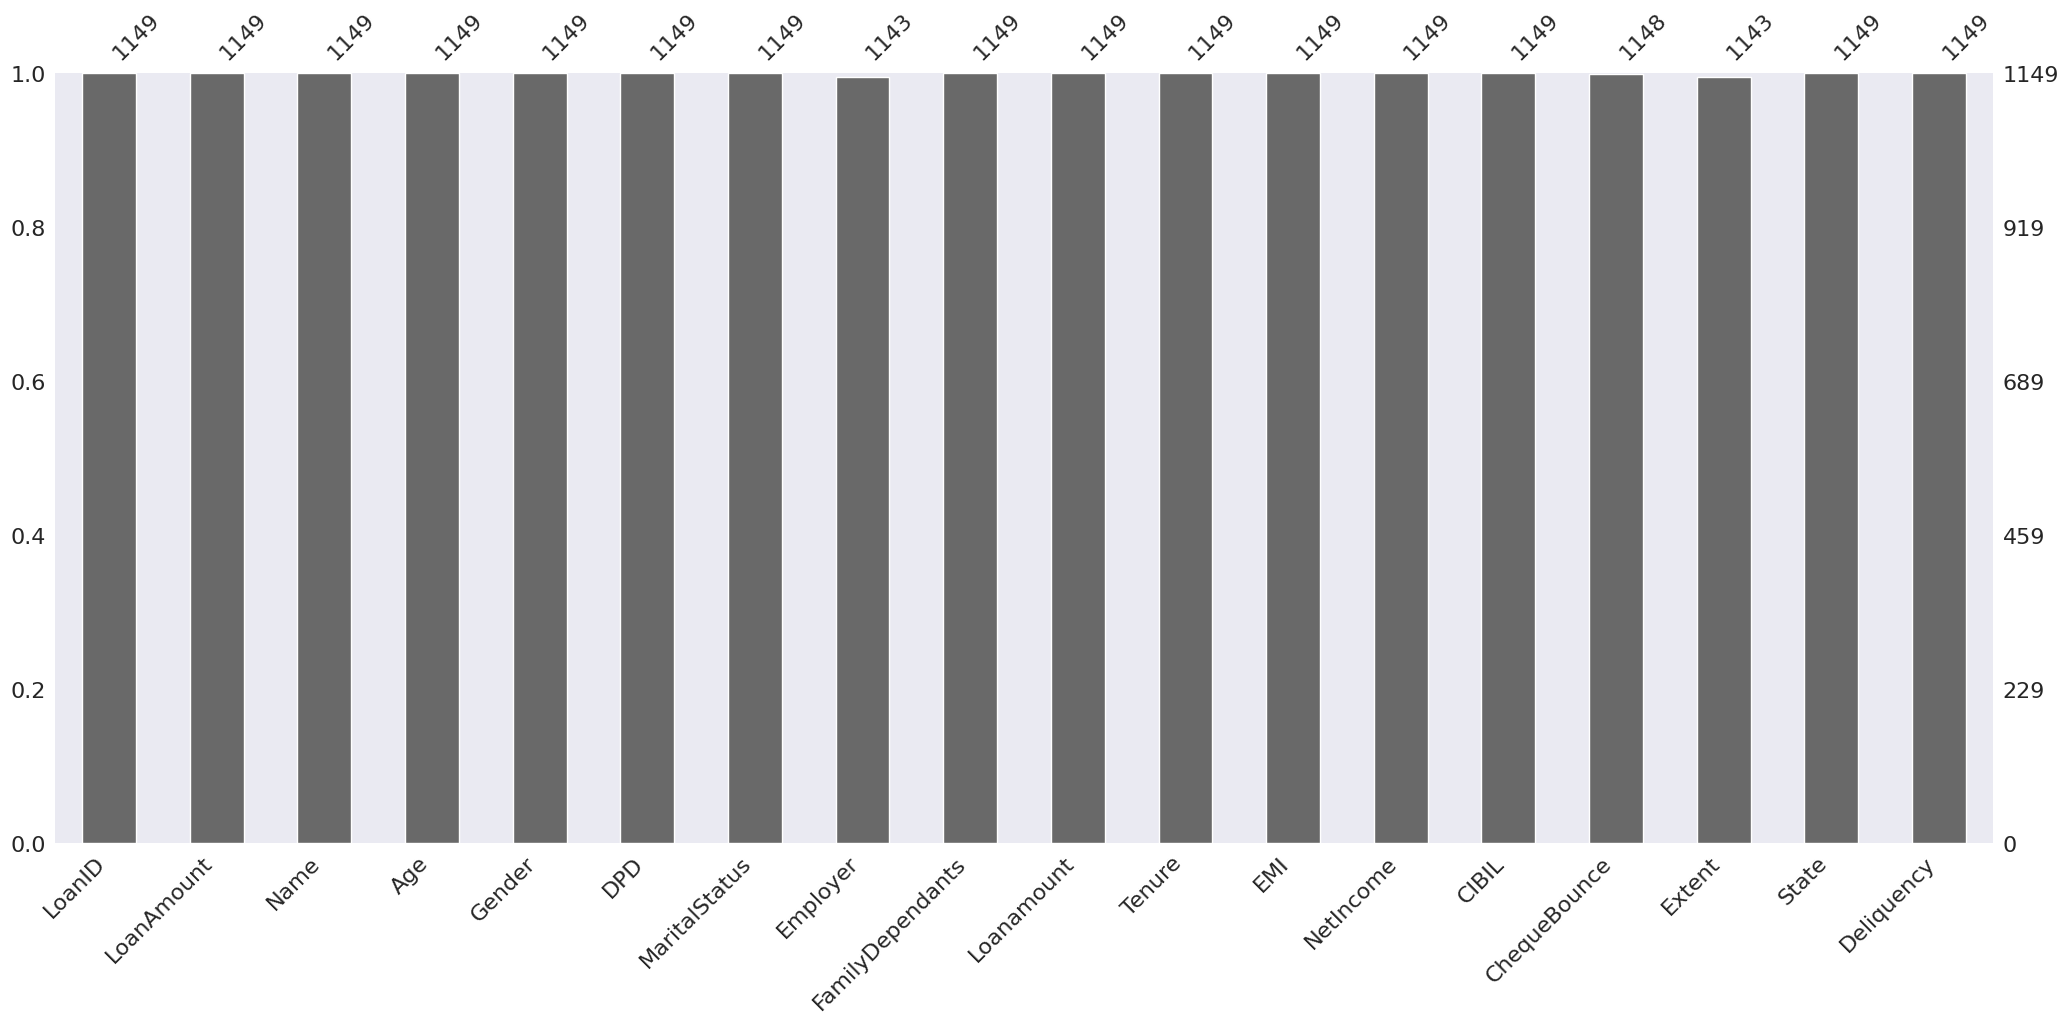

In [80]:
msno.bar(train)

<Axes: >

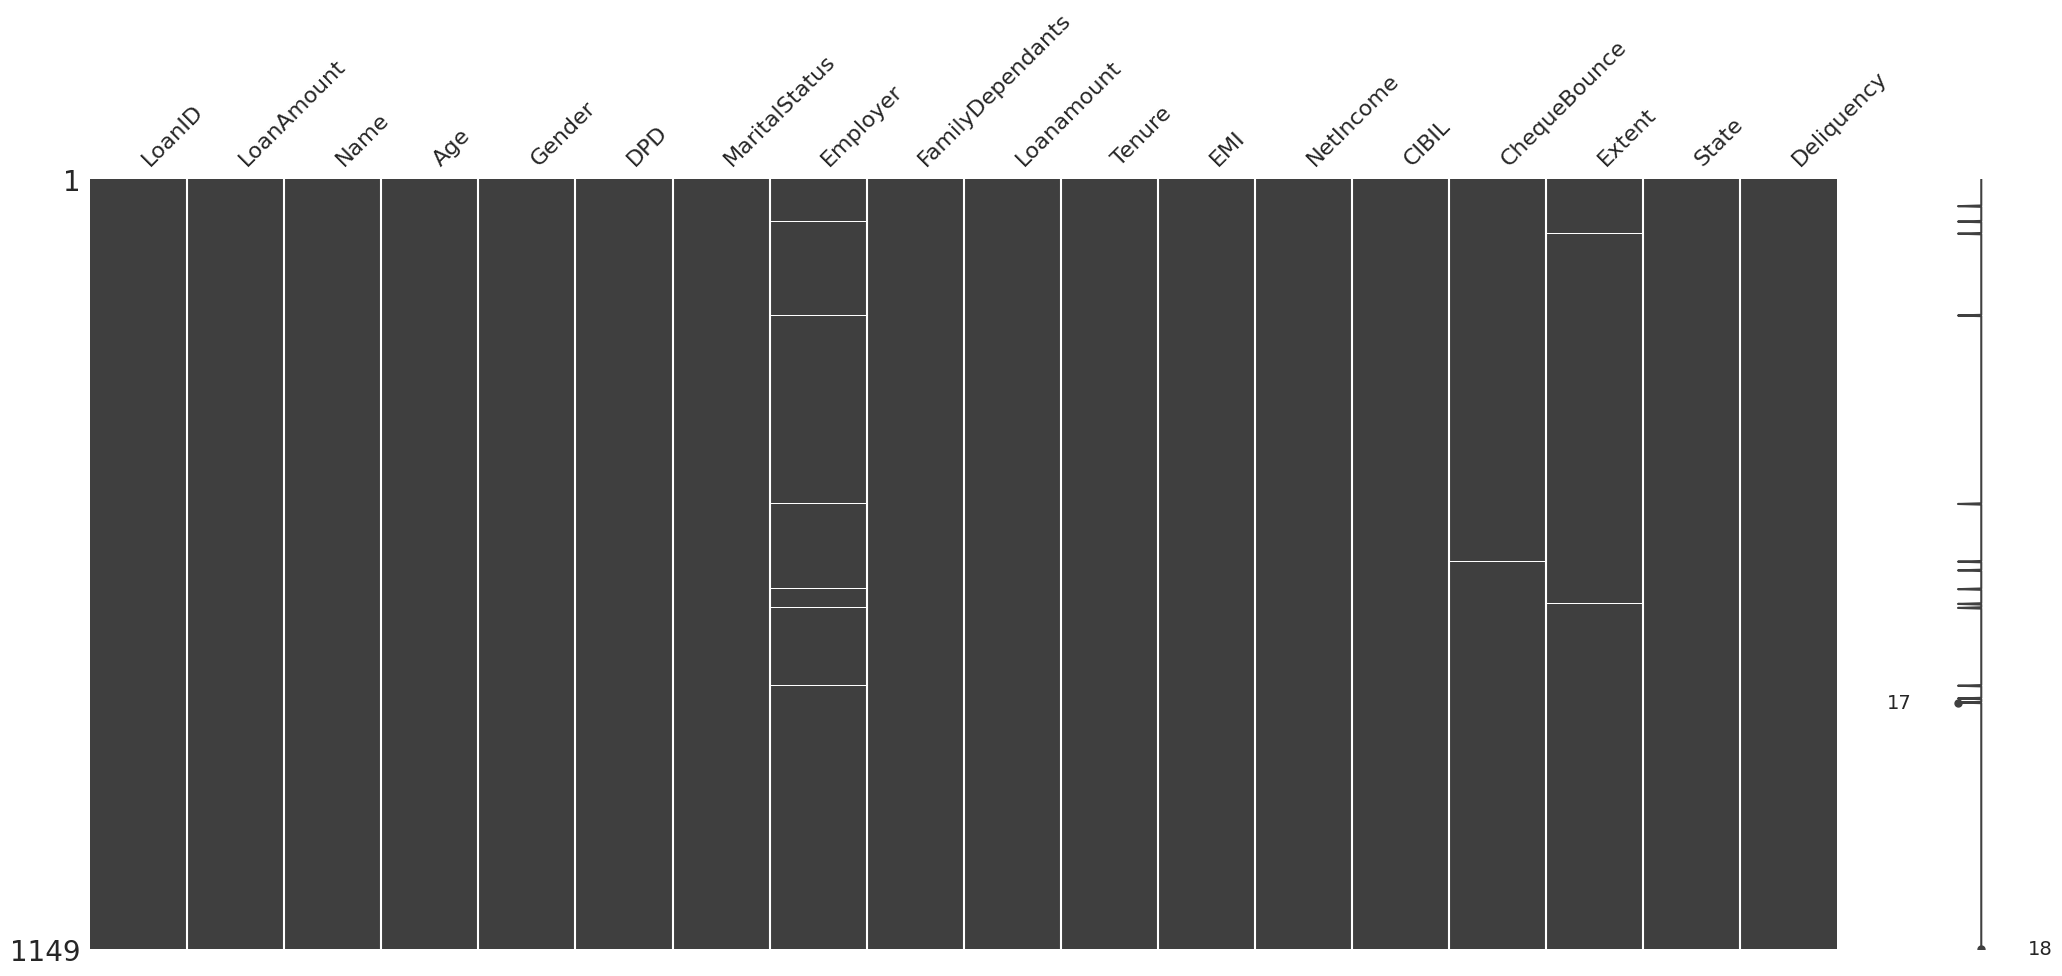

In [81]:
msno.matrix(train )

In [82]:
train['Extent'].fillna(train['Extent'].mode(), inplace=True) # Mode
test['Extent'].fillna(test['Extent'].mode(), inplace=True) # Mode



In [83]:
train.Deliquency = train.Deliquency.replace({"Yes": 1, "Nil" : 0})
# loan_test.Loan_Status = loan_test.Loan_Status.replace({"Y": 1, "N" : 0})

train.Gender = train.Gender.replace({"MALE": 1, "FEMALE" : 0})
test.Gender = test.Gender.replace({"MALE": 1, "FEMALE" : 0})

train.Married = train.MaritalStatus.replace({"OTHERS": 2,"MARRIED": 1, "UNMARRIED" : 0})
test.Married = test.MaritalStatus.replace({"OTHERS": 2,"MARRIED": 1, "UNMARRIED" : 0})

train.ChequeBounce = train.ChequeBounce.replace({"Yes": 1, "No" : 0})
test.ChequeBounce = test.ChequeBounce.replace({"Yes": 1, "No" : 0})

<ipython-input-83-27d4fe200fb0>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Married = train.MaritalStatus.replace({"OTHERS": 2,"MARRIED": 1, "UNMARRIED" : 0})
<ipython-input-83-27d4fe200fb0>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Married = test.MaritalStatus.replace({"OTHERS": 2,"MARRIED": 1, "UNMARRIED" : 0})


In [84]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Extent','Employer', 'FamilyDependants']
le = LabelEncoder()
for col in feature_col:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.set_style('dark')

In [86]:
train

,LoanID,LoanAmount,Name,Age,Gender,DPD,MaritalStatus,Employer,FamilyDependants,Loanamount,Tenure,EMI,NetIncome,CIBIL,ChequeBounce,Extent,State,Deliquency
0,4.334500e+14,250000,TUNTUN CHAUDHARY,42,1,0,MARRIED,5,0,250000,36,9809,100000,628,0,237,BIHAR,0
1,4.330400e+14,250000,BABAJI LENKA,51,1,0,MARRIED,4,0,250000,96,5395,29000,785,0,16,ODISHA,0
2,4.347500e+14,400000,RAVADA PRIYA,42,0,0,MARRIED,2,0,400000,84,9871,23797,769,0,7,ANDHRA PRADESH,0
3,4.333600e+14,500000,DIPTIMAYEE JENA,31,0,0,MARRIED,4,0,500000,36,19486,34400,-1,0,3,ODISHA,0
4,4.333600e+14,350000,NALINI SEN,35,1,23,OTHERS,4,0,350000,60,9867,-6700,738,0,356,ODISHA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,4.330400e+14,300000,SANATAN MALIKA,30,0,336,MARRIED,2,0,300000,120,6406,25000,-1,0,93,ODISHA,1
1145,4.128400e+14,350000,PRASANNAKUMARA H S,30,1,0,MARRIED,2,0,350000,60,9967,62700,-1,0,283,KARNATAKA,0
1146,4.128400e+14,750000,RITEESH,33,1,0,MARRIED,2,0,750000,108,15263,90200,-1,0,304,KARNATAKA,0
1147,4.128400e+14,250000,SAMPATH,44,1,0,MARRIED,2,0,250000,48,8151,35496,-1,0,9,KARNATAKA,0


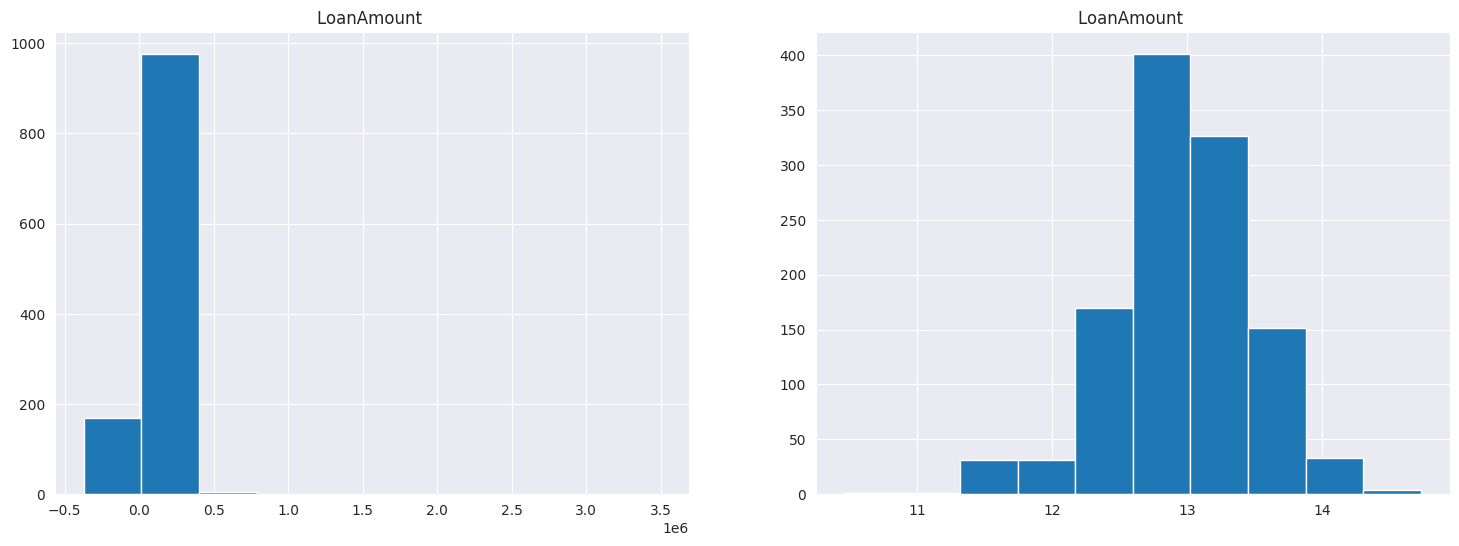

In [87]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


train['NetIncome'].hist(bins=10)
plt.title("LoanAmount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(train['LoanAmount']))
plt.title("LoanAmount ")

plt.show()

In [88]:

# import ml model from sklearn pacakge

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [89]:
column_name = 'Gender'
test.dropna(subset=["Gender"], inplace=True)

In [90]:
logistic_model = LogisticRegression()

In [91]:
train.Deliquency = train.Deliquency.replace({"Yes": 1, "Nil" : 0})


In [92]:
train_features = ['CIBIL', 'NetIncome', 'Gender']

x_train = train[train_features].values
y_train = train['Deliquency'].values

x_test = test[train_features].values

In [93]:
print(type(x_train[0]))

<class 'numpy.ndarray'>


In [94]:
print(type(y_train[0]))

<class 'numpy.int64'>


In [95]:
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [96]:
# Predict the model for testin data

predicted = logistic_model.predict(x_test)

In [97]:
# check the coefficeints of the trained model
print('Coefficient of model :', logistic_model.coef_)

Coefficient of model : [[-1.87731892e-03 -5.69462807e-06 -2.79079223e-06]]


In [98]:
# check the intercept of the model
print('Intercept of model',logistic_model.intercept_)

Intercept of model [-4.56195841e-06]


In [99]:
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8024369016536118
accuracy_score percent : 80.24


In [100]:

predict_test = logistic_model.predict(x_test)
print('Target on test data',predict_test)

Target on test data [0 0 0 ... 0 0 0]


In [101]:
print(predict_test)

[0 0 0 ... 0 0 0]


In [102]:
predicted_probabilities = logistic_model.predict_proba(x_test)

In [103]:
path="/content/drive/MyDrive/Modelling.csv"
df= pd.read_csv(path)
df

,LoanID,LoanAmount,Name,Age,Gender,DPD,MaritalStatus,Employer,FamilyDependants,Loanamount,Tenure,EMI,NetIncome,CIBIL,ChequeBounce,Extent,State,Deliquency
0,4.333500e+14,500000,LAKSHMI,51,FEMALE,41,OTHERS,Self Employed Business/Driver,4,500000,60,13247,59048,804,No,3.60,TAMIL NADU,Yes
1,4.333500e+14,500000,JERLINKUMAR,29,MALE,0,UNMARRIED,Salaried Professional,4,500000,60,13809,11000,744,No,12.56,TAMIL NADU,Nil
2,4.331200e+14,500000,SWAMINATHAN,36,MALE,997,MARRIED,Self Employed Business/Driver,0,500000,60,13809,204310,748,No,9.90,TAMIL NADU,Yes
3,4.333500e+14,550000,JEEVITHA,37,FEMALE,997,MARRIED,Salaried Professional,0,550000,60,14572,14000,761,No,5.84,TAMIL NADU,Yes
4,4.333500e+14,400000,RENUGADEVI,45,FEMALE,47,MARRIED,Self Employed Professional,2,400000,60,11507,35000,729,No,7.30,TAMIL NADU,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,4.347500e+14,400000,RAVADA PRIYA,42,FEMALE,0,MARRIED,Salaried Professional,0,400000,84,9871,23797,769,No,0.93,ANDHRA PRADESH,Nil
2324,4.313600e+14,500000,JAKIRHUSSAIN,24,MALE,0,MARRIED,Salaried Professional,0,500000,84,12024,17000,755,No,5.10,TAMIL NADU,Nil
2325,4.338000e+14,100000,NIHAL RANJAN MOHANTY,27,MALE,0,MARRIED,Self Employed Professional,0,100000,60,2791,40800,697,No,11.50,ODISHA,Nil
2326,4.338000e+14,400000,NIHAL RANJAN MOHANTY,27,MALE,0,MARRIED,Self Employed Professional,0,400000,60,11162,40800,697,No,11.50,ODISHA,Nil


In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
df = df.drop('Name', axis=1)

In [106]:
df.Deliquency = df.Deliquency.replace({"Yes": 1, "Nil" : 0})
# loan_test.Loan_Status = loan_test.Loan_Status.replace({"Y": 1, "N" : 0})

df.Gender = df.Gender.replace({"MALE": 1, "FEMALE" : 0})


df.Married = df.MaritalStatus.replace({"OTHERS": 2,"MARRIED": 1, "UNMARRIED" : 0})


df.ChequeBounce = df.ChequeBounce.replace({"Once in two months":2,"Once in three months":1, "No" : 0})





<ipython-input-106-505cce1d425a>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Married = df.MaritalStatus.replace({"OTHERS": 2,"MARRIED": 1, "UNMARRIED" : 0})


In [107]:
df = df.drop('Employer', axis=1)

In [109]:
df['MaritalStatus'] = df['MaritalStatus'].replace('OTHERS', 2)

In [111]:
df['MaritalStatus'] = df['MaritalStatus'].replace('UNMARRIED',1)

In [114]:
df['MaritalStatus'] = df['MaritalStatus'].replace('MARRIED', 0)

In [116]:
df = df.drop('State', axis=1)

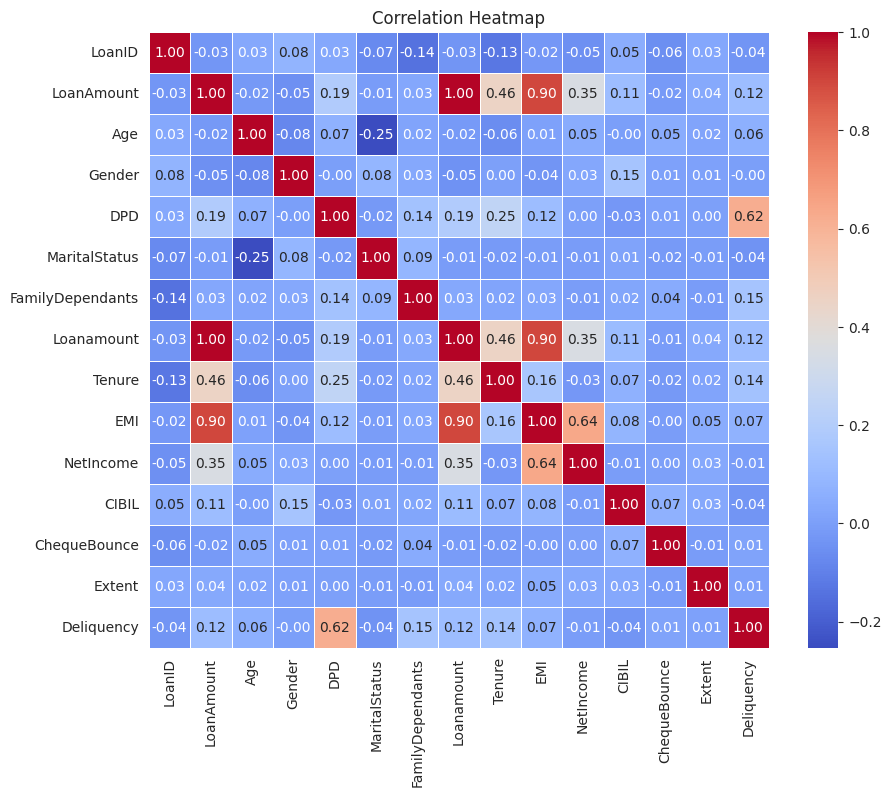

In [117]:
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [119]:
import pandas as pd

# Assuming df is your DataFrame containing the two variables
correlation_coefficient = df['Deliquency'].corr(df['CIBIL'])
correlation_coefficient

-0.03513134319120066

In [121]:
from scipy.stats import f_oneway

category_groups = [group['CIBIL'] for name, group in df.groupby('Deliquency')]
f_stat, p_value = f_oneway(*category_groups)
f_stat, p_value

(2.874322946082438, 0.09013665714468026)

In [123]:
import statsmodels.api as sm

X = sm.add_constant(df['CIBIL'])  # Add constant for intercept
y = df['Deliquency']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Deliquency   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.874
Date:                Wed, 15 May 2024   Prob (F-statistic):             0.0901
Time:                        06:18:57   Log-Likelihood:                -1057.2
No. Observations:                2328   AIC:                             2118.
Df Residuals:                    2326   BIC:                             2130.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1946      0.013     14.678      0.0